**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.spatial import KDTree
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
#%load_ext pycodestyle_magic

In [2]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n = n_neighbors
        self.alg = algorithm
    
    def fit(self, X, y):
        self.X_known = np.array(X)
        self.y_known = np.array(y)
            
    def predict(self, X):
        
        y_pred=[]        
        if(self.alg == 'brute'):
            dists = pairwise_distances(X, self.X_known)            

            for i in range(X.shape[0]):
                tmp = np.array(dists[i:])[0]

                min_ind = np.argpartition(tmp, self.n)
                k = self.n // 2
                while(k > 1):
                    min_ind = np.argpartition(min_ind, k).copy()
                    k = k // 2
                mins = self.y_known[min_ind[:self.n]].astype(int)
                
                b = []
                l = int(np.max(self.y_known)) + 1
                for j in range(l):
                    b.append(len(mins[mins == j]))

                y_pred.append(np.argmax(b))
                
        elif(self.alg == 'kd_tree'):
            
            tree = KDTree(self.X_known)
            
            for i in range(X.shape[0]):
                min_ind = tree.query(X[i,:],self.n)[1]
                known = self.y_known.astype(int)
                mins = known[min_ind]
                b = []

                l = int(np.max(known)) + 1
                for j in range(l):
                    b.append(len(mins[mins == j]))

                y_pred.append(np.argmax(b))
                
        return np.array(y_pred)
    
    def predict_proba(self, X):
        
        l = int(np.max(self.y_known)) + 1      
        y_prob = np.zeros((X.shape[0], l))
        
        if(self.alg == 'brute'):
            dists = pairwise_distances(X, self.X_known)
            for i in range(X.shape[0]):
                tmp = np.array(dists[i:])[0]

                min_ind = np.argpartition(tmp, self.n)
                k = self.n // 2
                while(k > 1):
                    min_ind = np.argpartition(min_ind, k).copy()
                    k = k // 2
                mins = self.y_known[min_ind[:self.n]].astype(int)

                b = np.array([0]*l)
                for j in range(len(b)):
                    b[j] = (len(mins[mins == j]))

                y_prob[i,:] = b / self.n
                
        elif(self.alg == 'kd_tree'):
            tree = KDTree(self.X_known)
            for i in range(X.shape[0]):
                min_ind = tree.query(X[i,:],self.n)[1]
                known = self.y_known.astype(int)
                mins = known[min_ind]
                
                l = int(np.max(known)) + 1
                b = np.array([0]*l)
                for j in range(len(b)):
                    b[j] = (len(mins[mins == j]))

                y_prob[i,:] = b / self.n

        return y_prob
        
    def score(self, X, y):
        pred = self.predict(X)
        true = 0
        for i in range(len(pred)):
            if(int(pred[i]) == int(y[i])):
                true += 1
                
        return true / len(pred)        

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 1.37 ms, total: 1.37 ms
Wall time: 1.21 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 129 µs, sys: 33 µs, total: 162 µs
Wall time: 136 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 3.04 ms, sys: 777 µs, total: 3.82 ms
Wall time: 5.03 ms


array([1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 2.59 ms, total: 2.59 ms
Wall time: 2.15 ms


array([1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 782 µs, sys: 209 µs, total: 991 µs
Wall time: 850 µs


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 3.84 ms, total: 3.84 ms
Wall time: 3.12 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

In [14]:
n_neighbors = np.arange(1, 100)
res=[]
for i in n_neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    my_clf.fit(X_train, y_train)
    res.append(my_clf.score(X_test, y_test))
    
print("optimal n_neighbors = ", n_neighbors[np.argmax(res)])

optimal n_neighbors =  1


Text(0, 0.5, 'score')

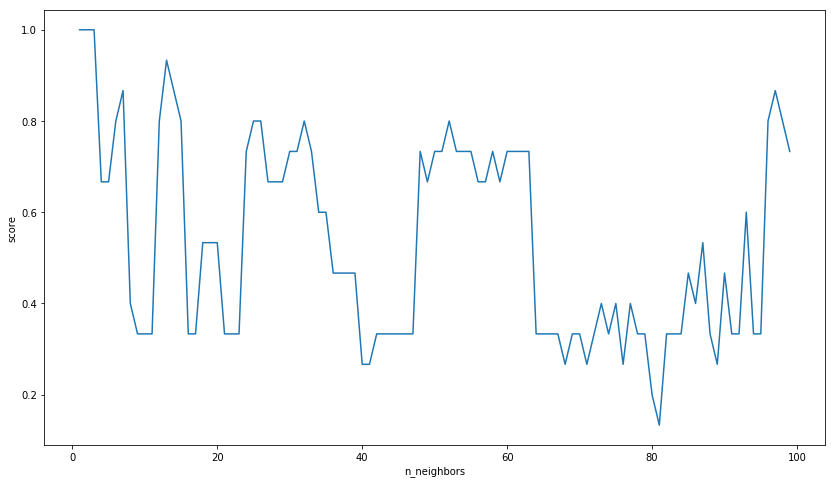

In [15]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
plt.plot(n_neighbors, res)
ax1.set_xlabel("n_neighbors")
ax1.set_ylabel("score")

**MNIST**

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 102 ms, sys: 4.26 ms, total: 106 ms
Wall time: 106 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 103 ms, sys: 185 ms, total: 288 ms
Wall time: 85.6 ms


In [21]:
%time clf.predict(X_test[:25,:])

CPU times: user 463 ms, sys: 0 ns, total: 463 ms
Wall time: 119 ms


array(['4', '3', '4', '3', '1', '6', '0', '5', '2', '1', '6', '2', '4',
       '2', '0', '4', '9', '1', '5', '7', '9', '5', '6', '9', '1'],
      dtype=object)

In [22]:
%time my_clf.predict(X_test[:25,:])

CPU times: user 756 ms, sys: 16.6 ms, total: 773 ms
Wall time: 201 ms


array([4, 3, 4, 3, 1, 6, 0, 5, 2, 1, 6, 2, 4, 2, 0, 4, 9, 1, 5, 7, 9, 5,
       6, 9, 1])

In [23]:
%time clf.predict_proba(X_test)

CPU times: user 4.13 s, sys: 307 ms, total: 4.44 s
Wall time: 1.43 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
%time A = my_clf.predict_proba(X_test)

CPU times: user 44.8 s, sys: 48.6 s, total: 1min 33s
Wall time: 23.6 s


In [25]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
clf.score(X_test, y_test)

0.9728571428571429

In [27]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train[:50, :], y_train[:50])
# ограничение чтобы избежать memory error

CPU times: user 280 µs, sys: 232 µs, total: 512 µs
Wall time: 517 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train[:50, :], y_train[:50])

CPU times: user 42 µs, sys: 35 µs, total: 77 µs
Wall time: 81.5 µs


In [32]:
%time clf.predict(X_test[:50, :])

CPU times: user 2.63 ms, sys: 2.86 ms, total: 5.49 ms
Wall time: 4.65 ms


array(['5', '1', '1', '1', '1', '6', '3', '5', '1', '5', '5', '3', '4',
       '1', '4', '6', '4', '4', '1', '1', '0', '7', '1', '1', '3', '7',
       '2', '7', '5', '1', '6', '4', '2', '7', '7', '4', '0', '5', '3',
       '7', '4', '1', '6', '1', '7', '1', '2', '1', '0', '5'],
      dtype=object)

In [33]:
%time my_clf.predict(X_test[:50, :])

CPU times: user 61.3 ms, sys: 9.46 ms, total: 70.7 ms
Wall time: 71.2 ms


array([5, 1, 1, 1, 1, 6, 3, 5, 1, 5, 5, 3, 4, 1, 4, 6, 4, 4, 1, 1, 0, 7,
       1, 1, 3, 7, 2, 7, 5, 1, 6, 4, 2, 7, 7, 4, 0, 5, 3, 7, 4, 1, 6, 1,
       7, 1, 2, 1, 0, 5])

In [34]:
%time clf.predict_proba(X_test[:50, :])

CPU times: user 4.98 ms, sys: 0 ns, total: 4.98 ms
Wall time: 4.54 ms


array([[0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. 

In [35]:
%time my_clf.predict_proba(X_test[:50, :])

CPU times: user 58.6 ms, sys: 10.5 ms, total: 69 ms
Wall time: 69.1 ms


array([[0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. 

In [36]:
clf.score(X_test, y_test)

0.54

In [37]:
my_clf.score(X_test, y_test)

0.54

Задание 5



# seaborn
- простое визуальное представление данных
# matplotlib 
- двухмерная графика
# train_test_split 
- разделение выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) 
- структура для произведения нескольких преобразований до финальной оценки
# StandardScaler (from sklearn.preprocessing import StandardScaler) 
- нормировка данных через матожидание и отклонение
# ClassifierMixin 
- измерение средней точности предсказаний классификатора
# NeighborsBase 
- родительский класс для метода ближайших соседей
# KNeighborsMixin
- разные методы поиска ближайших соседей
# SupervisedIntegerMixin
- обучение модели c проверкой